(50L, 50L)
https://static1.squarespace.com/static/51cdd10de4b08819bd7bc9b4/525d89c2e4b0f8245cabfc96/5400dbd4e4b0fc8cd2ef213e/1458152745999/SciSource_BU1440.jpg?format=750w


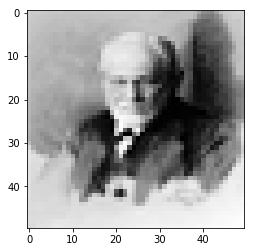

True

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageFilter
import numpy as np

class ImageURLExtractor(object):
    
    #default image size and dimension
    img_rows, img_cols, dim = 100, 100, 1
    
    def __init__(self, information):
        self.information = information
    
    def getTrainingData(self, inputTransform):
        no_of_images = len(self.information.trainingDataList)
        data = np.random.random((no_of_images, self.dim, inputTransform.transformSize[0].dimensionSize, inputTransform.transformSize[1].dimensionSize))
        image_index = 0
        
        if self.information.extractor == type(self).__name__:
            for trainingData in self.information.trainingDataList:
                response = requests.get(trainingData.URL)
                img = Image.open(BytesIO(response.content))
                
                #FIXME: move transformer to transform package
                img_rows = inputTransform.transformSize[0].dimensionSize
                img_cols = inputTransform.transformSize[1].dimensionSize
                img = img.resize((img_rows,img_cols), Image.ANTIALIAS)
                
                for parameter in inputTransform.transformParam:
                    if parameter.parameterName == 'color':
                        if parameter.parameterValue == 'grey':
                            print ("transform grey")
                            img = img.convert("L")         
                    if parameter.parameterName == 'process':
                        if parameter.parameterValue == 'edge':
                            print ("transform edge")
                            img = img.filter(ImageFilter.FIND_EDGES)
                            
                img = np.asarray(img, dtype=np.float32)     
                data[image_index, 0, :, :] = img
                print (img.shape)
                print (trainingData.URL)
                
        else:
            print ("Extractor in the information file and running extractor is not matching.")
        return data
    
    def getTestData(self, inputTransform):
        no_of_images = len(self.information.testDataList)
        data = np.random.random((no_of_images, self.dim, inputTransform.transformSize[0].dimensionSize, inputTransform.transformSize[1].dimensionSize))
        image_index = 0
        
        if self.information.extractor == type(self).__name__:
            for testData in self.information.testDataList:
                response = requests.get(testData.URL)
                img = Image.open(BytesIO(response.content))
                
                #FIXME: move transformer to transform package
                img_rows = inputTransform.transformSize[0].dimensionSize
                img_cols = inputTransform.transformSize[1].dimensionSize
                img = img.resize((img_rows,img_cols), Image.ANTIALIAS)
                
                for parameter in inputTransform.transformParam:
                    if parameter.parameterName == 'color':
                        if parameter.parameterValue == 'grey':
                            img = img.convert("L")         
                    if parameter.parameterName == 'process':
                        if parameter.parameterValue == 'edge':
                            img = img.filter(ImageFilter.FIND_EDGES)
                            
                img = np.asarray(img, dtype=np.float32)     
                data[image_index, 0, :, :] = img
                print (img.shape)
                print (testData.URL)
                
        else:
            print ("Extractor in the information file and running extractor is not matching.")
        return data   
    
    def getValidationData():
        return
    
    def getActionData():
        return
    
import scientists_pb2
import sys
import personaDefinition_pb2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

information = scientists_pb2.Information()

persona = personaDefinition_pb2.Persona()
dna = persona.DNAs.add()
inputLayer = dna.inputs.add()
inputLayer.inputTransform.transformerName = "imageTransform"
inputLayer.inputTransform.informationType = "image"
transformInputSize1 =  inputLayer.inputTransform.transformSize.add()
transformInputSize1.dimension = 1
transformInputSize1.dimensionSize = 50
transformInputSize2 =  inputLayer.inputTransform.transformSize.add()
transformInputSize2.dimension = 1
transformInputSize2.dimensionSize = 50
transformParam1 = inputLayer.inputTransform.transformParam.add()
transformParam1.parameterName = "color"
transformParam1.parameterValue  = "grey"
# transformParam2 = inputLayer.inputTransform.transformParam.add()
# transformParam2.parameterName = "process"
# transformParam2.parameterValue  = "edge"


# Read the existing address book.
f = open("test.bin", "rb")
information.ParseFromString(f.read())
f.close()

imageURLExtractor = ImageURLExtractor(information)
x = imageURLExtractor.getTestData(inputLayer.inputTransform)

for imgIndex in range(x.shape[0]):
    plt.imshow(x[imgIndex][0]*255, cmap = cm.Greys_r)
    plt.show()
    
type(x).__module__ == np.__name__